In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
sns.set_style('darkgrid')

from datetime import date

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing, model_selection
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer,SimpleImputer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
 #!ls /content/drive/MyDrive/Technocolabs_Project/Data-Analyst-Internship-Project-Code-TCSDA45689/data/LoanExport.csv

In [13]:
 LoanE = pd.read_csv("/content/drive/MyDrive/Internship Project Team/Dataset/LoanExport.csv")

In [14]:
#LoanE = pd.read_csv('/Users/nisha/TechnoColabs/Data-Analyst-Internship-Project-Code-TCSDA45689/data/LoanExport.csv')

In [15]:
LoanE.head(10)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
5,0,199902,N,202901,X,25,1,O,89,40,...,80400,F199Q1224802,N,360,2,Ot,Other servicers,0,0,42
6,0,199902,N,202901,X,25,1,O,90,21,...,53100,F199Q1291436,P,360,1,RE,Other servicers,0,0,44
7,0,199902,X,202901,36740,0,1,O,72,20,...,32800,F199Q1001824,N,360,1,NO,WELLSFARGOBANKNA,1,3,145
8,0,199902,Y,202710,25540,30,1,O,95,38,...,6400,F199Q1079744,P,345,1,Ot,Other servicers,0,0,64
9,0,199902,Y,202901,48620,30,1,O,95,27,...,67000,F199Q1196318,P,360,1,Ot,WELLSFARGOBANKNA,1,104,212


In [16]:
LoanE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

****

In [17]:
LoanE.shape

(291451, 28)

In [18]:
LoanE.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [19]:
LoanE["FirstPaymentDate"] = pd.to_datetime(LoanE["FirstPaymentDate"],format="%Y%m")
LoanE["MaturityDate"] = pd.to_datetime(LoanE["MaturityDate"],format="%Y%m")

In [20]:
LoanE["FirstPaymentDate"].head()

0   1999-02-01
1   1999-02-01
2   1999-02-01
3   1999-02-01
4   1999-02-01
Name: FirstPaymentDate, dtype: datetime64[ns]

#### Checking for:
Data types . Presence of nulls

In [21]:
LoanE.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In LoanExport Dataset Seller Name is missing

### Data Exploration

In [22]:
#list of all the numeric columns
num = LoanE.select_dtypes('number').columns.to_list()

#list of all the categoric columns
cat = LoanE.select_dtypes('object').columns.to_list()

#numeric df
Loan_num =  LoanE[num]

#categoric df
Loan_cat = LoanE[cat]

print(num)
print(cat)


['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment']
['FirstTimeHomebuyer', 'MSA', 'Occupancy', 'Channel', 'PPM', 'ProductType', 'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose', 'NumBorrowers', 'SellerName', 'ServicerName']


In [23]:
#LoanE['MSA'].nunique()
#LoanE['MSA'].value_counts()
#Str_MSA= LoanE['MSA'].str.strip()
#Str_MSA_New = Str_MSA.apply(lambda v: '0' if v == 'X' else v)
#Str_MSA_New= Str_MSA_New.apply(int)
#Str_MSA_New= Str_MSA_New.apply(int)
#Str_MSA_New.head(10)

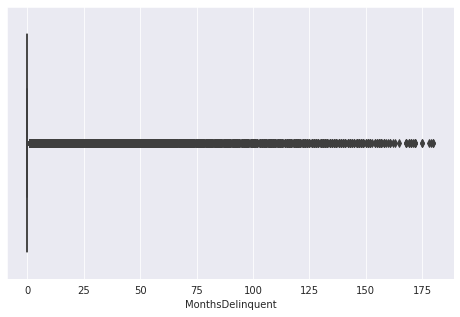

In [24]:
#Checking For Outliers
plt.figure(figsize=(8,5))
sns.boxplot('MonthsDelinquent', data=LoanE)

There are no outliers in Months Delinquent

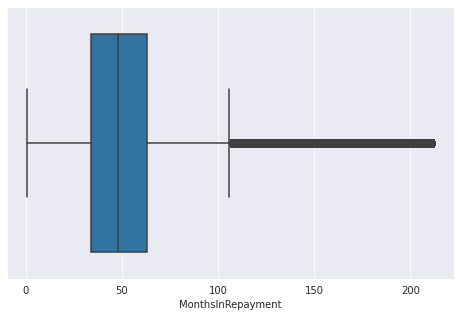

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot('MonthsInRepayment', data=LoanE)

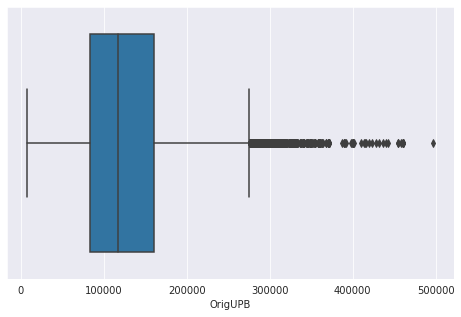

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot('OrigUPB', data=LoanE)

### Explore Metropolitan Statistical Area (MSA)
 It may be divided into smaller groups of counties that the United States Office 
of Management and Budget refers to as Metropolitan Divisions.

values  missing because the area is not a metropolitan area or the value is unknown. 
Since, we are not sure what the value could be, we will fill the missing values with Unknown.

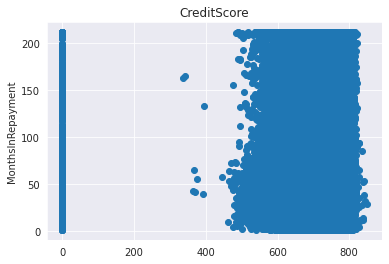

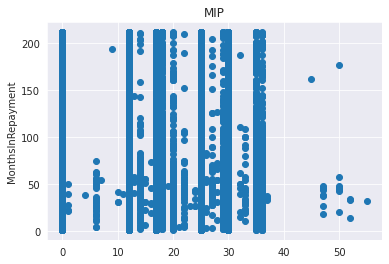

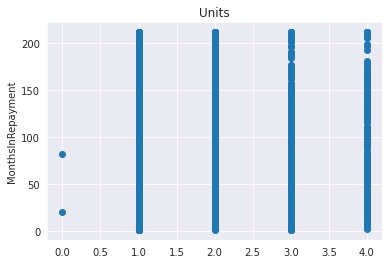

In [27]:
for numeric in Loan_num[num[:3]]:
    plt.scatter(Loan_num[numeric], Loan_num['MonthsInRepayment'])
    plt.title(numeric)
    plt.ylabel('MonthsInRepayment')
    plt.show()

MIP(Mortgage Insurance percentage) - The data is very spreaded, no specific pattern.

Units- Months in Repayments are same for every units.

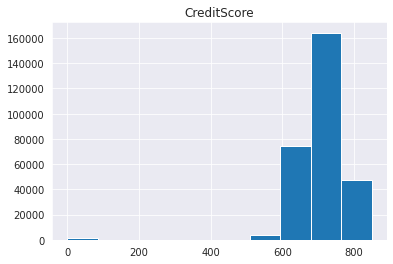

In [28]:
numeric = LoanE.select_dtypes('number').columns.to_list()
numeric 
BM_num =  LoanE[num]

plt.hist(LoanE['CreditScore'])
plt.title("CreditScore")
plt.show()

Credit Score- Most of the people have Credit Score between 700 to 800.

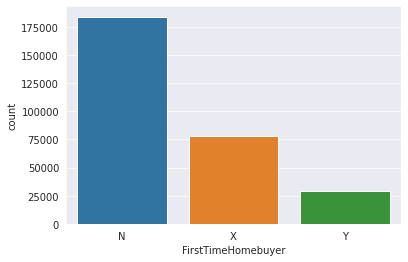

In [29]:
sns.countplot('FirstTimeHomebuyer', data=LoanE)

Majority of the borrowers are not first-time home buyers.

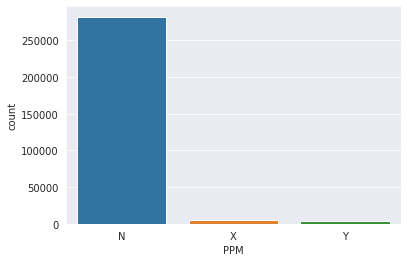

In [30]:
sns.countplot('PPM', data=LoanE)

Most of the people doesn't have Prepayment Penalty Mortgage.

In [31]:
LoanE['EverDelinquent'].value_counts()

0    233788
1     57663
Name: EverDelinquent, dtype: int64

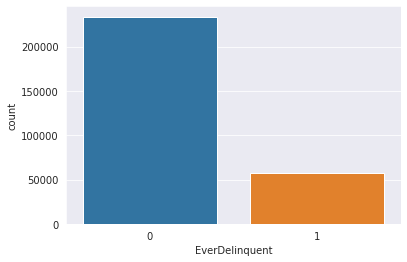

In [32]:
sns.countplot('EverDelinquent', data=LoanE)

19.78% Applications has defaulted atleast 1 time 

In [33]:
LoanE['NumBorrowers'].value_counts()

2     187335
1     103777
X        339
Name: NumBorrowers, dtype: int64

In [34]:
LoanE.iat[1256,22]

'X '

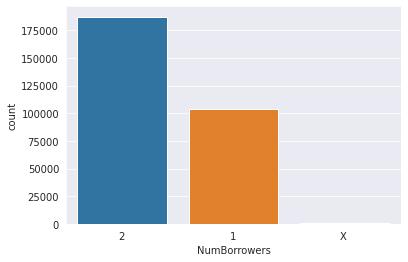

In [35]:
sns.countplot('NumBorrowers', data=LoanE)

Most of it are two borrowers.

In [36]:
LoanE.PropertyType.value_counts()

SF    244923
PU     27506
CO     18100
MH       723
LH       105
CP        72
X         22
Name: PropertyType, dtype: int64

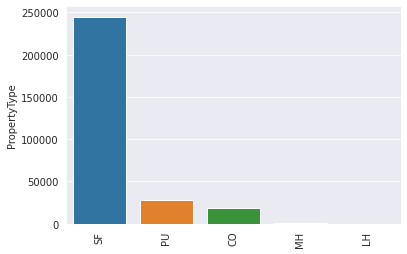

<Figure size 1080x1080 with 0 Axes>

In [37]:
PropertyTypes=LoanE.PropertyType.value_counts().head(5)
sns.barplot(PropertyTypes.index,PropertyTypes)
plt.xticks(rotation=90)
plt.figure(figsize=(15,15));

CO: Condo

PU: Planned Unit Development

MH: Manufactured Housing

SF: Single-Family

CP: Cooperative share

LH: Leasehold

X: Missing Values

Observations:

Single family homes are the most popular option amongst borrowers by a large margin.

22(0.1%) data are missing.

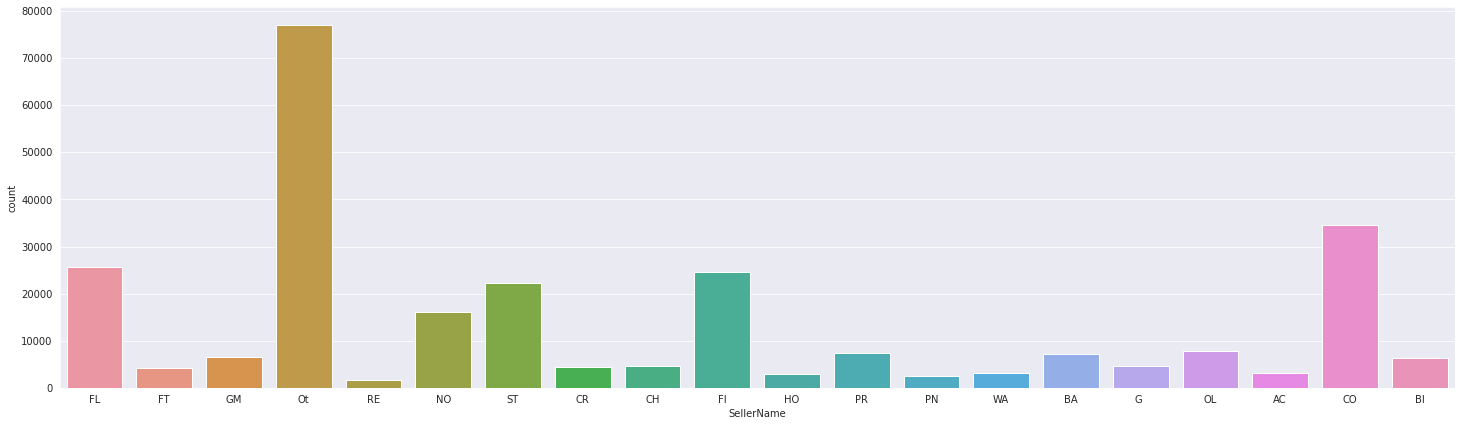

In [38]:
plt.figure(figsize=(25,7))
sns.countplot('SellerName', data=LoanE)

In [39]:
LoanE.SellerName.value_counts()

Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: SellerName, dtype: int64

Seller name 'ot' is the highest and then seller 'co'

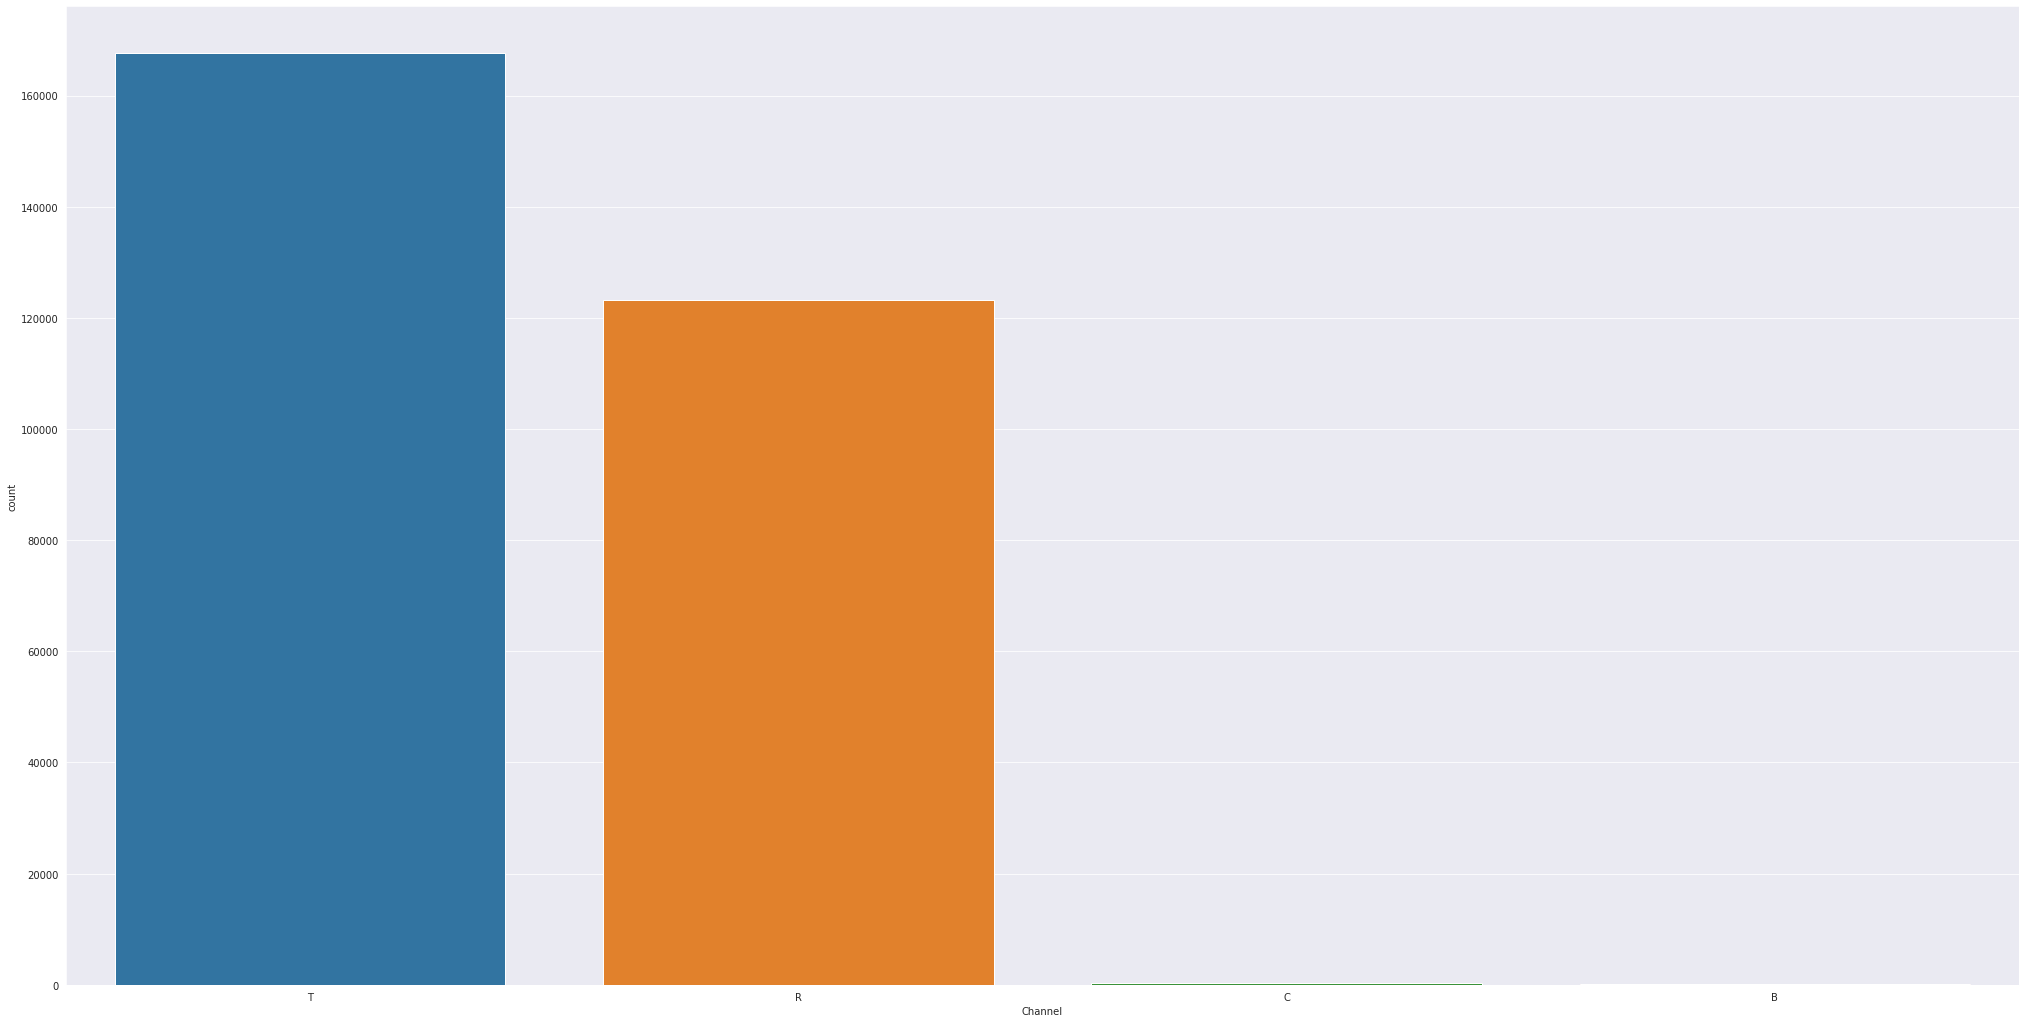

In [40]:
plt.figure(figsize=(35,18))
sns.countplot('Channel', data=LoanE)


 T- Third party
 
 R- Retail
 
 C- Correspondence
 
 B- Brocker

 
 Third party channel is the highest and then Retail.

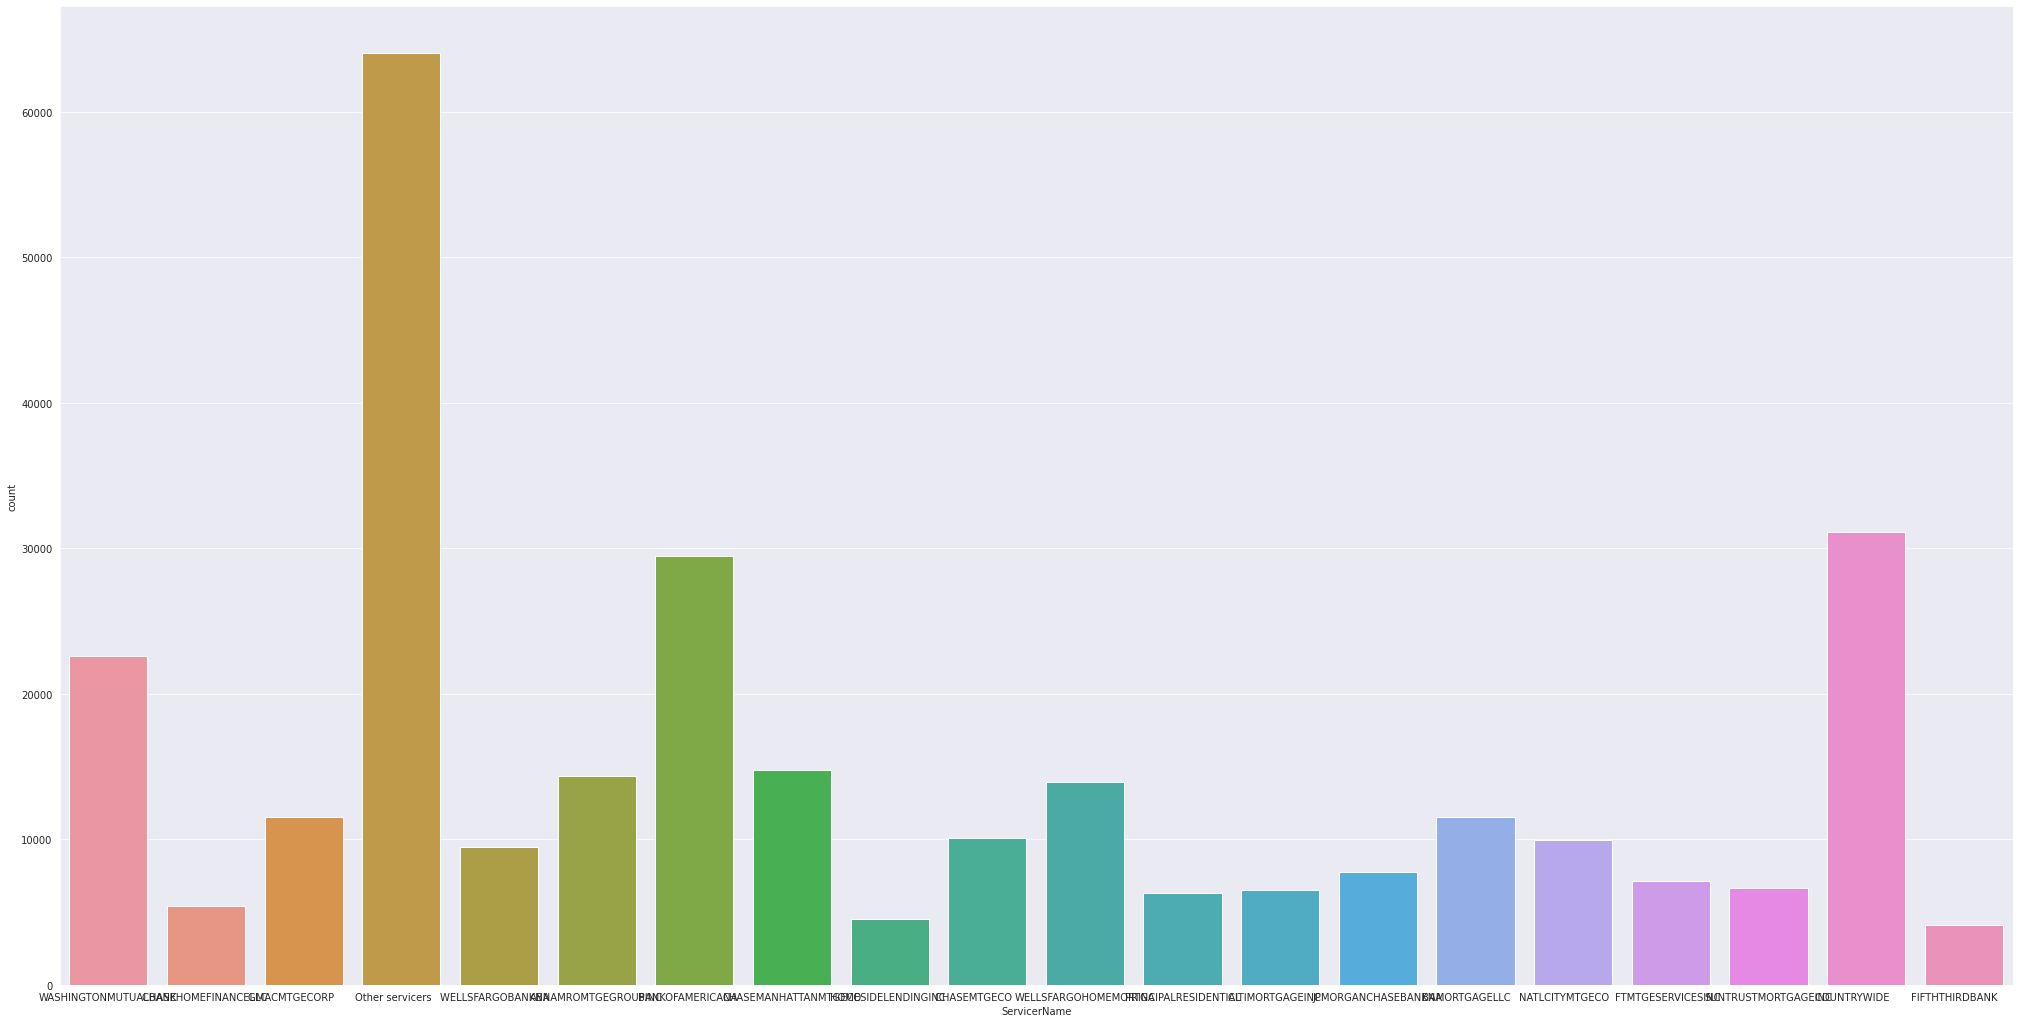

In [41]:
plt.figure(figsize=(35,18))
sns.countplot('ServicerName', data=LoanE)


Other servicers are more and then Countrywide is more in number.

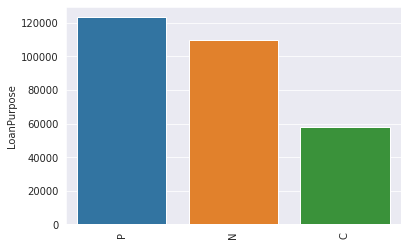

<Figure size 1080x1080 with 0 Axes>

In [42]:
LoanPurposes=LoanE.LoanPurpose.value_counts().head(5)
sns.barplot(LoanPurposes.index,LoanPurposes)
plt.xticks(rotation=90)
plt.figure(figsize=(15,15));

P: Purchase

C: Refinance - Cash Out

N: Refinance - No Cash Out

Majority of the loans requested are for purchasing a property.

No handles with labels found to put in legend.


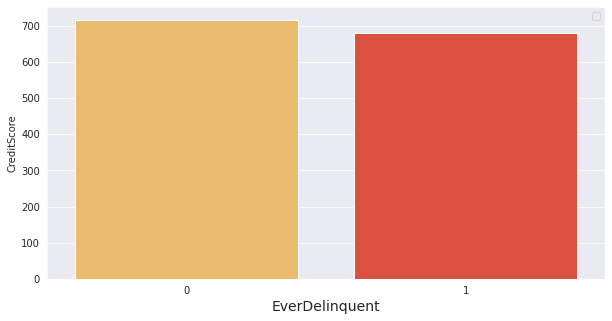

In [43]:
plt.figure(figsize=(10,5))
sns.barplot('EverDelinquent' ,'CreditScore', data= LoanE ,palette='YlOrRd')
plt.xlabel('EverDelinquent', fontsize=14)
plt.legend()
plt.show()

From the above plot we can see that as credit score increases the likelihood of defaulting on the loan decreases. 
This is expected. A higher credit score indicates the borrower is relatively more capable of paying off the loan.
For credit score 500-690, the likelihood of defaulting on a loan is higher.
For credit score >690, the likelihood of not defaulting on the loan is higher.


In [44]:
LoanE.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

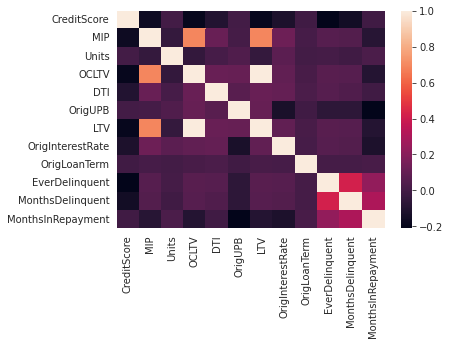

In [45]:
#plotting the correlation matrix

sns.heatmap(LoanE.corr() ,cmap='rocket')


OCLTV is highly correlated with LTV

### Feature Engineering

In [46]:
#Function for replace the not available values to "nan"
def feature_nan(LoanE):
    LoanE.replace('X', np.nan, inplace = True)
   #For feature property type 
    LoanE.replace('X ', np.nan, inplace = True)
    #For MSA
    LoanE.replace('X    ', np.nan, inplace = True)    
    LoanE['CreditScore'].replace(0, np.nan, inplace= True)
    LoanE['LTV'].replace(0, np.nan, inplace= True)
    LoanE['Units'].replace(0, np.nan, inplace= True)
    return(LoanE)

In [47]:
#function for converting MSA features to [1,0]
def feature_msa(LoanE):
    LoanE['MSA'].iloc[LoanE['MSA'].notnull()] = 1
    LoanE['MSA'].fillna(0, inplace= True)
    return(LoanE)

In [48]:
LoanE= feature_nan(LoanE)
LoanE = feature_msa(LoanE)

In [49]:
LoanE.isnull().sum()

CreditScore            1189
FirstPaymentDate          0
FirstTimeHomebuyer    78015
MaturityDate              0
MSA                       0
MIP                       0
Units                     2
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       5
OrigInterestRate          0
Channel                   0
PPM                    5405
ProductType               0
PropertyState             0
PropertyType             22
PostalCode                6
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers            339
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [50]:
LoanE.isnull().sum()/LoanE.shape[0]*100

CreditScore            0.407959
FirstPaymentDate       0.000000
FirstTimeHomebuyer    26.767793
MaturityDate           0.000000
MSA                    0.000000
MIP                    0.000000
Units                  0.000686
Occupancy              0.000000
OCLTV                  0.000000
DTI                    0.000000
OrigUPB                0.000000
LTV                    0.001716
OrigInterestRate       0.000000
Channel                0.000000
PPM                    1.854514
ProductType            0.000000
PropertyState          0.000000
PropertyType           0.007548
PostalCode             0.002059
LoanSeqNum             0.000000
LoanPurpose            0.000000
OrigLoanTerm           0.000000
NumBorrowers           0.116315
SellerName             8.575713
ServicerName           0.000000
EverDelinquent         0.000000
MonthsDelinquent       0.000000
MonthsInRepayment      0.000000
dtype: float64

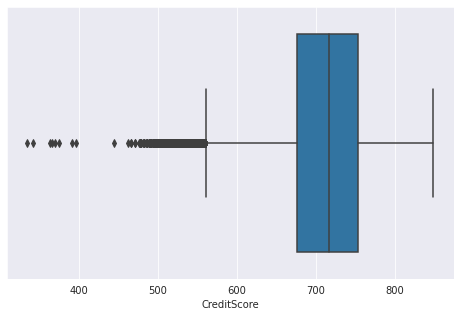

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot('CreditScore', data=LoanE)

In [52]:
LoanE =  LoanE.dropna(subset=['PPM'])

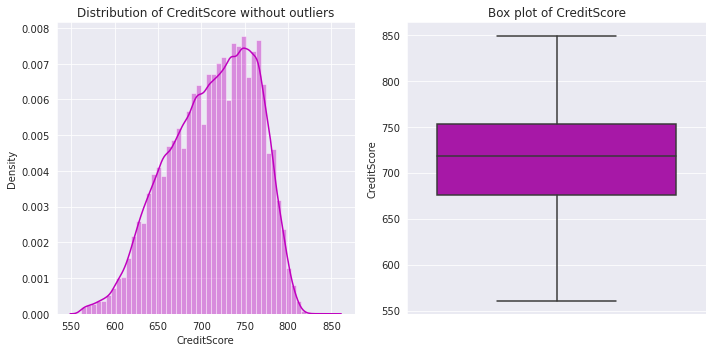

(283703, 28)


In [53]:
Q1= LoanE['CreditScore'].quantile(0.25)
Q3 = LoanE['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
Higher = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
LoanE=LoanE[(LoanE['CreditScore'] > lower) & (LoanE['CreditScore'] < Higher)]
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(LoanE['CreditScore'],color='m',ax=axes[0])
sns.boxplot(y=LoanE['CreditScore'],color='m',ax=axes[1])
axes[0].set_title('Distribution of CreditScore without outliers')
axes[1].set_title('Box plot of CreditScore')
plt.tight_layout()
plt.show()
print(LoanE.shape)

In [54]:
LoanE.isnull().sum()/LoanE.shape[0]*100

CreditScore            0.000000
FirstPaymentDate       0.000000
FirstTimeHomebuyer    27.090655
MaturityDate           0.000000
MSA                    0.000000
MIP                    0.000000
Units                  0.000705
Occupancy              0.000000
OCLTV                  0.000000
DTI                    0.000000
OrigUPB                0.000000
LTV                    0.001762
OrigInterestRate       0.000000
Channel                0.000000
PPM                    0.000000
ProductType            0.000000
PropertyState          0.000000
PropertyType           0.007755
PostalCode             0.002115
LoanSeqNum             0.000000
LoanPurpose            0.000000
OrigLoanTerm           0.000000
NumBorrowers           0.117024
SellerName             8.720740
ServicerName           0.000000
EverDelinquent         0.000000
MonthsDelinquent       0.000000
MonthsInRepayment      0.000000
dtype: float64

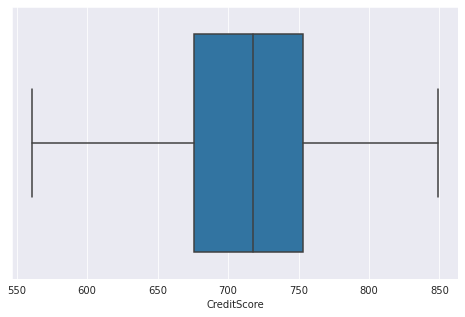

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot('CreditScore', data=LoanE)

In [56]:
LoanE.shape

(283703, 28)

In [57]:
LoanE.Units.value_counts()

1.0    278016
2.0      4546
3.0       573
4.0       566
Name: Units, dtype: int64

In [58]:
LoanE.isna().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer    76857
MaturityDate              0
MSA                       0
MIP                       0
Units                     2
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       5
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType             22
PostalCode                6
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers            332
SellerName            24741
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [59]:
LoanE =  LoanE.dropna(subset=['PPM'])

Assumption:-
Sellar name 'NA' might be Servicer name 'NATLCITYMTGECO'
But Panda taking NA as a null value which might not that's why will replace this with 'NT'

In [60]:
LoanE['SellerName'].fillna('NT',inplace = True)

In [61]:
LoanE.isna().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer    76857
MaturityDate              0
MSA                       0
MIP                       0
Units                     2
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       5
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType             22
PostalCode                6
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers            332
SellerName                0
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [62]:
LoanE.shape

(283703, 28)

#### Dropping column which is not useful

In [63]:
LoanD= LoanE.drop(['FirstPaymentDate','MaturityDate','OCLTV','PostalCode','LoanSeqNum','ProductType','PropertyState'],axis= 1)


In [64]:
LoanD.head(10)

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,DTI,OrigUPB,LTV,OrigInterestRate,...,PPM,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
2406,561.0,N,1,25,1.0,O,30,217000,86.0,7.250,...,N,PU,N,360,1,NT,WASHINGTONMUTUALBANK,1,8,39
2407,561.0,N,1,12,1.0,O,33,191000,80.0,7.000,...,N,CO,C,360,2,Ot,BANKOFAMERICANA,0,0,63
2408,561.0,N,1,25,1.0,O,57,144000,86.0,6.750,...,N,SF,P,360,1,NO,WELLSFARGOHOMEMORTGA,0,0,49
2409,561.0,N,1,30,1.0,O,41,129000,95.0,7.500,...,N,SF,P,360,2,G,Other servicers,0,0,7
2410,561.0,N,1,25,1.0,O,18,126000,90.0,6.875,...,N,SF,P,360,1,WA,WASHINGTONMUTUALBANK,0,0,46
2411,561.0,N,1,30,1.0,O,41,181000,95.0,7.250,...,N,SF,P,360,2,NO,WELLSFARGOBANKNA,0,0,74
2412,561.0,N,1,0,1.0,O,35,92000,77.0,6.625,...,N,SF,N,360,1,Ot,SUNTRUSTMORTGAGEINC,1,22,29
2413,561.0,NaN,1,30,1.0,O,17,128000,95.0,7.375,...,N,SF,N,360,2,Ot,Other servicers,1,6,58
2414,561.0,NaN,1,0,1.0,O,0,70000,80.0,7.250,...,N,SF,P,360,1,FI,FTMTGESERVICESINC,1,6,29
2415,561.0,NaN,1,0,1.0,O,0,98000,80.0,6.500,...,N,SF,N,360,1,FI,NATLCITYMTGECO,0,0,96


In [65]:
LoanD.shape

(283703, 21)

Label Encoding

In [66]:
#label encoding

le = LabelEncoder()
Label = ['PPM']
for i in Label:
    LoanD[i] = le.fit_transform(LoanD[i])


In [67]:
LoanD.shape

(283703, 21)

In [68]:
LoanD['PPM'].head()

2406    0
2407    0
2408    0
2409    0
2410    0
Name: PPM, dtype: int64

In [69]:
#list of all the categoric columns
cate = LoanD.select_dtypes('object').columns.to_list()

#categoric df
LoanD_cate = LoanE[cate]

In [70]:
cate

['FirstTimeHomebuyer',
 'Occupancy',
 'Channel',
 'PropertyType',
 'LoanPurpose',
 'NumBorrowers',
 'SellerName',
 'ServicerName']

#one hot encoding

In [71]:

# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
LoanD_oh = pd.DataFrame(OH_encoder.fit_transform(LoanD[cate])).astype('int64')

#get feature columns
LoanD_oh.columns = OH_encoder.get_feature_names(cate)

# One-hot encoding removed index; put it back
LoanD_oh.index = LoanD.index
# LoanD1 = LoanD.drop(cols)

# Add one-hot encoded columns 
LoanD_fe = pd.concat([LoanD, LoanD_oh], axis=1)


In [72]:
LoanD.columns

Index(['CreditScore', 'FirstTimeHomebuyer', 'MSA', 'MIP', 'Units', 'Occupancy',
       'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'Channel', 'PPM',
       'PropertyType', 'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers',
       'SellerName', 'ServicerName', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment'],
      dtype='object')

In [73]:
LoanD_fe.head()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,DTI,OrigUPB,LTV,OrigInterestRate,...,ServicerName_GMACMTGECORP,ServicerName_HOMESIDELENDINGINC,ServicerName_JPMORGANCHASEBANKNA,ServicerName_NATLCITYMTGECO,ServicerName_Other servicers,ServicerName_PRINCIPALRESIDENTIAL,ServicerName_SUNTRUSTMORTGAGEINC,ServicerName_WASHINGTONMUTUALBANK,ServicerName_WELLSFARGOBANKNA,ServicerName_WELLSFARGOHOMEMORTGA
2406,561.0,N,1,25,1.0,O,30,217000,86.0,7.250,...,0,0,0,0,0,0,0,1,0,0
2407,561.0,N,1,12,1.0,O,33,191000,80.0,7.000,...,0,0,0,0,0,0,0,0,0,0
2408,561.0,N,1,25,1.0,O,57,144000,86.0,6.750,...,0,0,0,0,0,0,0,0,0,1
2409,561.0,N,1,30,1.0,O,41,129000,95.0,7.500,...,0,0,0,0,1,0,0,0,0,0
2410,561.0,N,1,25,1.0,O,18,126000,90.0,6.875,...,0,0,0,0,0,0,0,1,0,0


In [74]:
#LoanD_fe.columns

In [75]:
LoanD_fe.shape

(283703, 85)

In [76]:
LoanD_fe.drop(cate, axis=1, inplace=True)

In [77]:
LoanD_fe.shape

(283703, 77)

Imputing null values with KNN Imputer

In [78]:
imputer = KNNImputer(n_neighbors=2)
LoanD_fe_arr = imputer.fit_transform(LoanD_fe)
LoanD_fe = pd.DataFrame(LoanD_fe_arr, columns=LoanD_fe.columns)

Splitting into test and train data

In [79]:
from sklearn.model_selection import StratifiedShuffleSplit
y = LoanD_fe['PPM']
X = LoanD_fe.drop('PPM', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify= y)


In [80]:
X_train.head(5)

,CreditScore,MSA,MIP,Units,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,...,ServicerName_GMACMTGECORP,ServicerName_HOMESIDELENDINGINC,ServicerName_JPMORGANCHASEBANKNA,ServicerName_NATLCITYMTGECO,ServicerName_Other servicers,ServicerName_PRINCIPALRESIDENTIAL,ServicerName_SUNTRUSTMORTGAGEINC,ServicerName_WASHINGTONMUTUALBANK,ServicerName_WELLSFARGOBANKNA,ServicerName_WELLSFARGOHOMEMORTGA
228760,761.0,1.0,30.0,1.0,31.0,92000.0,95.0,6.750,360.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110864,701.0,1.0,25.0,1.0,23.0,83000.0,87.0,6.875,360.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41142,654.0,1.0,0.0,1.0,27.0,78000.0,66.0,7.000,360.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
269884,785.0,1.0,0.0,1.0,0.0,84000.0,77.0,6.750,360.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
60267,669.0,1.0,0.0,1.0,0.0,205000.0,48.0,7.000,360.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
y.value_counts()

0.0    279791
1.0      3912
Name: PPM, dtype: int64

In [82]:
y_test.value_counts()

0.0    55959
1.0      782
Name: PPM, dtype: int64

In [83]:
y_train.value_counts()

0.0    223832
1.0      3130
Name: PPM, dtype: int64

In [84]:
X_train.dtypes

CreditScore                          float64
MSA                                  float64
MIP                                  float64
Units                                float64
DTI                                  float64
                                      ...   
ServicerName_PRINCIPALRESIDENTIAL    float64
ServicerName_SUNTRUSTMORTGAGEINC     float64
ServicerName_WASHINGTONMUTUALBANK    float64
ServicerName_WELLSFARGOBANKNA        float64
ServicerName_WELLSFARGOHOMEMORTGA    float64
Length: 76, dtype: object

**Building** **Models**


In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Logistic Regression

In [86]:
model= LogisticRegression(solver='newton-cg', class_weight='balanced')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.8729666378808975

In [87]:
from sklearn.metrics import classification_report
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93     55959
         1.0       0.10      0.98      0.18       782

    accuracy                           0.87     56741
   macro avg       0.55      0.93      0.55     56741
weighted avg       0.99      0.87      0.92     56741



In [88]:
from sklearn.metrics import classification_report
preds = model.predict(X_train)
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93    223832
         1.0       0.09      0.97      0.17      3130

    accuracy                           0.87    226962
   macro avg       0.55      0.92      0.55    226962
weighted avg       0.99      0.87      0.92    226962



### Now, let us try to do Hyper-parameter Tunning using Cross-Validation via Grid Search

In [89]:
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [90]:
logreg = LogisticRegression(class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=cv)                     # number of folds

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report
preds = clf.predict(X_test)
print(classification_report(y_test, preds))

K-Nearest Neighbors

In [ ]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

In [ ]:
from sklearn.metrics import classification_report
preds = classifier.predict(X_test)
print(classification_report(y_test, preds))

We have a huge Class Imbalance!!

In [ ]:
import imblearn

In [ ]:
def get_model(model_name):
    if model_name == "decision_tree":
        model = DecisionTreeClassifier(class_weight="balanced", random_state=0)
    elif model_name == "random_forest":
        model = RandomForestClassifier(class_weight="balanced", random_state=0)
    elif model_name == "logistic_regression":
        model = LogisticRegression(class_weight="balanced", max_iter=10000, random_state=0, C=0.001, solver='liblinear', penalty='l1')
    else:
        raise ValueError("model_name should be one of \"decision_tree\" or \"random_forest\" or \"logistic_regression\"")
    return model


Treating class imbalance using Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
def create_smote_pipeline(model_name):
    # categoric_transformer = ColumnTransformer([("cat", OneHotEncoder(sparse=False), categoric_cols)], remainder="passthrough")
    over_sampler = imblearn.over_sampling.SMOTE(sampling_strategy=0.25, random_state=42)
    under_sampler = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.25, random_state=42)
    model = get_model(model_name)
    
    smote_model_pipeline = imblearn.pipeline.Pipeline(
        steps=[
            # ("categoric_transformer", categoric_transformer),
            ("minority_over_sampler", over_sampler),
            ("majority_under_sampler", under_sampler),
            ("model", model)
        ]
    )
    return smote_model_pipeline

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

def get_train_test_scores(model_pipeline):
    model_pipeline.fit(X_train, y_train) 
    
    train_predictions = model_pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)

    fpr, tpr, thresholds = roc_curve(y_train, train_predictions)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    ####################################
    # The optimal cut off would be where tpr is high and fpr is low
    # tpr - (1-fpr) is zero or near to zero is the optimal cut off point
    ####################################
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print(f"optimal threshold for prediction: {optimal_threshold}")
    
    test_predictions = model_pipeline.predict(X_test)
    # print(test_predictions[:10])
    # test_predictions = [1 if pred > 0.75 else 0 for pred in test_predictions]
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    confusion_scores_df = pd.DataFrame(confusion_matrix(y_test, test_predictions))
    classification_rep = classification_report(y_test, test_predictions)
    
    print(f"train_accuracy: {train_accuracy}")
    print(f"test_accuracy: {test_accuracy}")
    print(f"confusion_matrix:\n{confusion_scores_df}")
    print(f"classification_report:\n{classification_rep}")

In [ ]:
smote_dtree_pipeline = create_smote_pipeline("logistic_regression")
get_train_test_scores(smote_dtree_pipeline)